In [1]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 7.5 MB/s eta 0:00:00


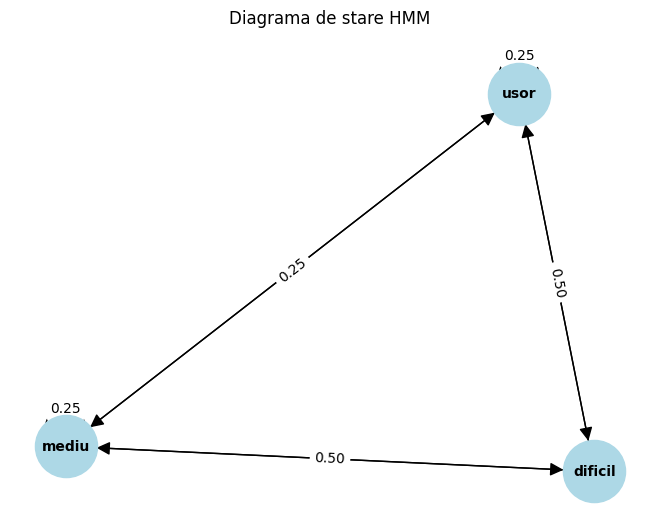

Cea mai probabilăa secventa de dificultati: ['mediu', 'dificil', 'usor', 'dificil', 'mediu', 'usor', 'dificil', 'mediu', 'usor', 'dificil', 'mediu', 'usor']
Probabilitatea acestei secvente: 2.7142096552569898e-11


In [2]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import networkx as nx

states = ["dificil", "mediu", "usor"]
observations = ["FB", "B", "S", "NS"]
n_states = len(states)
n_observations = len(observations)

transition_matrix = np.array([
    [0.0, 0.5, 0.5],  #dificil -> [mediu, usor]
    [0.5, 0.25, 0.25],  #mediu -> [dificil, mediu, usor]
    [0.5, 0.25, 0.25]   #usor -> [dificil, mediu, usor]
])

means = np.array([[0], [1], [2], [3]])  #FB=0, B=1, S=2, NS=3
covars = np.tile(np.identity(1), (n_states, 1, 1))

initial_probabilities = np.array([1/3, 1/3, 1/3])

model = hmm.GaussianHMM(n_components=n_states, covariance_type="full")
model.startprob_ = initial_probabilities
model.transmat_ = transition_matrix
model.means_ = means
model.covars_ = covars

def plot_hmm_graph(states, transition_matrix):
    G = nx.DiGraph()
    for i, state in enumerate(states):
        G.add_node(state)
    for i, state_from in enumerate(states):
        for j, state_to in enumerate(states):
            prob = transition_matrix[i, j]
            if prob > 0:
                G.add_edge(state_from, state_to, weight=prob, label=f"{prob:.2f}")

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("Diagrama de stare HMM")
    plt.show()

plot_hmm_graph(states, transition_matrix)
observed_sequence = ["FB", "FB", "S", "B", "B", "S", "B", "B", "NS", "B", "B", "S"]
observed_indices = [observations.index(obs) for obs in observed_sequence]
observed_indices = np.array(observed_indices).reshape(-1, 1)

logprob, state_sequence = model.decode(observed_indices, algorithm="viterbi")
most_probable_states = [states[state] for state in state_sequence]

print("Cea mai probabilăa secventa de dificultati:", most_probable_states)
print("Probabilitatea acestei secvente:", np.exp(logprob))
